C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Districtwise weekday,weekend and total crime counts
    DistrictCode  weekdaycount  weekendcount  TotalCrimeCount
0              1           108            79              187
1              8           107            72              179
2             14           105            72              177
3             15           112            64              176
4             24            64            52              116
5              6            75            71              146
6             16            86            35              121
7              9           106            63              169
8             22            57            44              101
9             18           133           108              241
10             5            71            63              134
11             2           122            77              199
12            17            74            33              107
13            11           160           117              277
14             4  

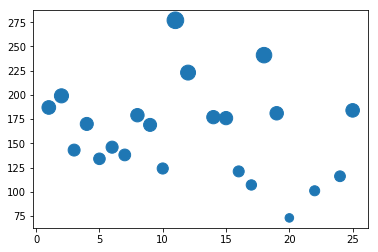

In [10]:
#Report - Districtwise weekday and weekend crime counts - with ratio
import datetime
import pandas as pd
#from collections import Counter
import matplotlib.pyplot as plt
#Read the file
file = open("C:\\DataSets\\SampleCrimeData.csv", "r+")
#print(file)

#Get the header
header = file.readline()[0:-1]
headerColumns = header.split(",")

#Process other elements
data = file.readlines()
file.close()

#Parse the data
#remove newline and store in data1
data1 = []
for element in data:
    if(element[-1] == '\n'):
       data1.append(element[0:-1])
    else:
        data1.append(element)
#create list for district
list_district = []
for element in data1:
    list_district.append(int(element.split(',')[9]))
#print("List of districts:",list_district)

#create unique list of districts
list_uniq_districts = []
for element in list_district:
    if (element in list_uniq_districts):
        pass
    else:
        list_uniq_districts.append(element)
#print("Unique District List is: ",list_uniq_districts)

#create list of crime dates
list_dates = []
for element in data1:
    list_dates.append(element.split(',')[2])
#print("List of Crime Dates is:",list_dates)

#create list of weekdays
#list_weekdays = []
#list_weekends = []
list_dayNo = []

#weekdays_set = {1,2,3,4,5}
#weekends_set = {6,7}

#create a list with day#
for element in list_dates:
    element1 = datetime.datetime.strptime(element, '%m/%d/%Y %H:%M')
    #print('element1 is: ', element1)
    element2 = element1.isoweekday()# find day# in the week - 1 for Monday and 7 for Sunday
    #print('element2 is: ', element2)
    list_dayNo.append(element2)
    #if (element2 in weekdays_set):
        #list_weekdays.append(element2)
    #if (element2 in weekends_set):
        #list_weekends.append(element2)
    #print("date, weekday#",element1,element2 )
#print("list of day# for weekday are:",list_weekdays)
#print("list of day# for weekend are:",list_weekends)
#print("List of day# is:", list_dayNo)

#Create the dataframe of district and day#
df = pd.DataFrame(
    {'DistrictCode': list_district,
     'DayNo': list_dayNo
    })
#print("dataframe is")
#print(df)

#create dataframe for weekday calculation
isWeekDay = ((df['DayNo'] == 1) | (df['DayNo'] == 2) | (df['DayNo'] == 3) | (df['DayNo'] == 4) | (df['DayNo'] == 5))
filtered_weekday_df = df[isWeekDay]
#print("filtered_weekday_df is")
#print(filtered_weekday_df)

#remove day# from weekdaydataframe
del filtered_weekday_df['DayNo']
#print("filtered_weekday_df after deletion")
#print(filtered_weekday_df)

#get the count of crimes for each districtcode in weekday
filtered_weekday_df['weekdaycount'] = filtered_weekday_df.groupby('DistrictCode')['DistrictCode'].transform('count')
#print("df_weekend_groupedBy is :", df_weekend_groupedBy) 
filtered_weekday_df = filtered_weekday_df.drop_duplicates(['DistrictCode'], keep='first')
#print("filtered_weekday_df after change is")
#print(filtered_weekday_df)

#create dataframe for weekend calculation
isWeekEnd = ((df['DayNo'] == 6) | (df['DayNo'] == 7))
filtered_weekend_df = df[isWeekEnd]
#print("filtered_weekend_df is")
#print(filtered_weekend_df)

#remove day# from weekend dataframe
del filtered_weekend_df['DayNo']
#print("filtered_weekend_df after deletion")
#print(filtered_weekend_df)

#get the count of crimes for each districtcode in weekend
filtered_weekend_df['weekendcount'] = filtered_weekend_df.groupby('DistrictCode')['DistrictCode'].transform('count')
#print("df_weekend_groupedBy is :", df_weekend_groupedBy) 
filtered_weekend_df = filtered_weekend_df.drop_duplicates(['DistrictCode'], keep='first')
#print("filtered_weekend_df after change is")
#print(filtered_weekend_df)

#Join the dataframes
#filtered_weekday_df.set_index('DistrictCode', inplace = True)
#filtered_weekend_df.set_index('DistrictCode', inplace = True)
#df_joined = filtered_weekday_df.join(filtered_weekend_df)
df_joined = pd.merge(filtered_weekday_df,filtered_weekend_df, on = 'DistrictCode',how='outer')
#print("Districtwise weekday and weekend crime counts")
#print(df_joined)

#calculate ratio and add as column to the dataframe
#df_joined["wd_we_ratio"] = df_joined["weekdaycount"]/df_joined["weekendcount"]
#print("Districtwise weekday and weekend crime counts - with ratio")
#print(df_joined)

#calculate total no of crimes and add as column
df_joined["TotalCrimeCount"] = df_joined["weekdaycount"] + df_joined["weekendcount"]
print("Districtwise weekday,weekend and total crime counts")
print(df_joined)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df_joined['DistrictCode'],df_joined['TotalCrimeCount'], s = df_joined['TotalCrimeCount']) # Added third variable income as size of the bubble
plt.show()


In [2]:
from datetime import date

In [3]:
import calendar

In [4]:
my_date = date.today()

In [12]:
my_date

datetime.date(2017, 9, 29)

In [9]:
my_date.isoweekday() in range(1,7)

True

In [10]:
my_date.isoweekday()

5

In [13]:
print("List of Crime Dates is:",list_dates)

List of Crime Dates is: ['9/15/2001 2:00', '11/2/2001 18:30', '12/15/2001 2:00', '9/26/2002 13:30', '10/1/2002 19:00', '11/5/2002 16:40', '8/7/2005 7:15', '10/17/2006 13:05', '10/1/2005 9:00', '8/25/2007 9:22', '2/26/2008 0:00', '6/28/2008 23:00', '7/31/2008 4:30', '8/8/2008 23:00', '9/23/2008 6:30', '2/23/2006 19:06', '9/29/2009 12:00', '12/8/2009 10:45', '10/10/2009 21:50', '7/20/2014 3:00', '12/9/2013 9:00', '1/5/2002 21:24', '12/21/2014 15:25', '4/18/2016 22:30', '3/9/2015 16:34', '4/21/2016 0:01', '4/22/2016 9:00', '1/26/2016 15:00', '10/25/2015 18:54', '1/19/2017 18:28', '2/2/2016 12:00', '4/22/2016 8:00', '4/3/2016 5:00', '4/13/2016 18:00', '3/19/2016 19:00', '4/7/2016 9:00', '2/15/2016 10:00', '4/4/2016 1:00', '4/12/2016 16:00', '4/16/2016 17:00', '3/3/2016 14:00', '11/5/2015 15:35', '11/4/2015 23:33', '4/6/2016 11:15', '5/1/2016 0:01', '5/28/2016 13:00', '6/22/2016 16:00', '2/28/2016 14:00', '5/15/2016 20:00', '9/1/2014 12:01', '4/19/2016 13:30', '4/11/2016 8:00', '3/17/2016 1